In [2]:
import pandas as pd
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
# Load datasets
bg = pd.read_csv('data/burglary_2017.csv')
pts = pd.read_csv('data/burg_pts_2017.csv')

In [57]:
# we need to transpose dataframe as cluster.cmeans function required that
# otherwise we will not get error message but the result is not right
pts = pts.transpose()
pts.shape

(3, 7090)

In [58]:
# apply fuzzy c-mean function
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(pts, 25, 2, error=0, maxiter=2000, init=None, seed=None)

In [59]:
fpc

0.7021545853434155

In [60]:
# get final membership
cluster = np.argmax(u, axis=0)

In [61]:
# return data to original shape
pts = pts.transpose()

In [62]:
# add cluster membership to dataframe
pts['cluster'] = cluster
pts.head()

,Unnamed: 0,Latitude,Longitude,cluster
0,5285383.0,40.828142,-73.941772,13
1,5285426.0,40.723869,-73.900987,13
2,5285496.0,40.834503,-73.913373,13
3,5285646.0,40.755100,-73.833253,13
4,5285660.0,40.689600,-73.849719,13


In [63]:
# Count points in each cluster
pts['cluster'].value_counts()

15    339
8     338
4     321
11    319
18    316
0     314
10    303
22    297
16    294
14    293
6     290
5     286
1     283
24    280
17    271
3     269
12    265
2     263
13    256
7     254
19    253
23    251
9     249
21    244
20    242
Name: cluster, dtype: int64

In [84]:
vhigh = pts[(pts['cluster'] == 15)| (pts['cluster'] == 8)|(pts['cluster'] == 4)| (pts['cluster'] == 11)
           | (pts['cluster'] == 18)]
vhigh['class'] = 'V High'

high = pts[(pts['cluster'] == 0)| (pts['cluster'] == 10)| (pts['cluster'] == 22)| (pts['cluster'] == 16)| (pts['cluster'] == 14)]
high['class'] = 'High'

mod = pts[(pts['cluster'] == 6)| (pts['cluster'] == 5)| (pts['cluster'] == 1)| (pts['cluster'] == 24)| (pts['cluster'] == 17)]
mod['class'] = 'Moderate'

low = pts[(pts['cluster'] == 3)| (pts['cluster'] == 12)| (pts['cluster'] == 2)| (pts['cluster'] == 13)| (pts['cluster'] == 7)]
low['class'] = 'Low'

vlow = pts[(pts['cluster'] == 19)| (pts['cluster'] == 23) | (pts['cluster'] == 9)| (pts['cluster'] == 21)| (pts['cluster'] == 20)]
vlow['class'] = 'V Low'

final = pd.concat([vlow, low, mod, high, vhigh], axis=0)
final['class'].unique()

C:\Users\rodan\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\rodan\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\rodan\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

array(['V Low', 'Low', 'Moderate', 'High', 'V High'], dtype=object)

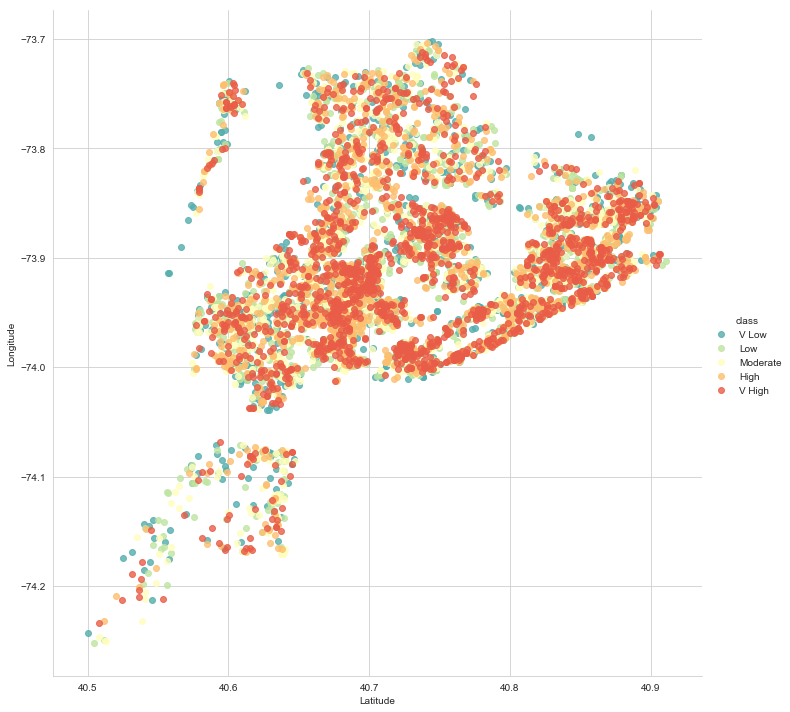

In [98]:
sns.set_style("whitegrid")
sns.set_palette("Spectral_r", 5)
sns.lmplot('Latitude', 'Longitude', data=final, hue='class', height=10, fit_reg=False)
plt.savefig('images/all_burg.jpg')

### Burglary by hour

In [99]:
# crime by hour
bg['hours'] = pd.DatetimeIndex(bg['CMPLNT_FR_TM']).hour

### Duration 1: Midnight to 6 am

In [100]:
df_00_06 = bg[(bg['hours'] >= 0) & (bg['hours'] <= 6)]
df_00_06.shape

(1346, 24)

In [101]:
df_00_06 = df_00_06[['Latitude', 'Longitude']].transpose()

In [102]:
# apply fuzzy c-mean function
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(df_00_06, 10, 2, error=0, maxiter=2000, init=None, seed=None)

In [103]:
fpc

0.5137877848010173

In [104]:
# get final membership
cluster = np.argmax(u, axis=0)

In [105]:
df_00_06 = df_00_06.transpose()

In [106]:
# add cluster membership to dataframe
df_00_06['cluster'] = cluster
df_00_06.head()

,Latitude,Longitude,cluster
3,40.755100,-73.833253,4
4,40.689600,-73.849719,0
8,40.688954,-73.999280,3
14,40.740505,-73.985036,3
42,40.846194,-73.861491,6


In [107]:
df_00_06['cluster'].value_counts()

5    201
2    174
7    155
1    143
6    130
0    130
9    122
4    120
3    115
8     56
Name: cluster, dtype: int64

In [112]:
#vhigh['class'] = 'V High'
#high = df_06_12[(df_06_12['cluster'] == 6) | (df_06_12['cluster'] == 5)| (df_06_12['cluster'] == 4)]
#high['class'] = 'High'
mod = df_00_06[(df_00_06['cluster'] == 5)]
mod['class'] = 'Moderate'
low = df_00_06[(df_00_06['cluster'] == 9)| (df_00_06['cluster'] == 7)| (df_00_06['cluster'] == 0)
               | (df_00_06['cluster'] == 3)| (df_00_06['cluster'] == 4) | (df_00_06['cluster'] == 2)
               | (df_00_06['cluster'] == 1)| (df_00_06['cluster'] == 6)]
low['class'] = 'Low'
vlow = df_00_06[(df_00_06['cluster'] == 8)]
vlow['class'] = 'V Low'
final = pd.concat([mod, low, vlow], axis=0)
final['class'].unique()

C:\Users\rodan\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\rodan\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\rodan\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas

array(['Moderate', 'Low', 'V Low'], dtype=object)

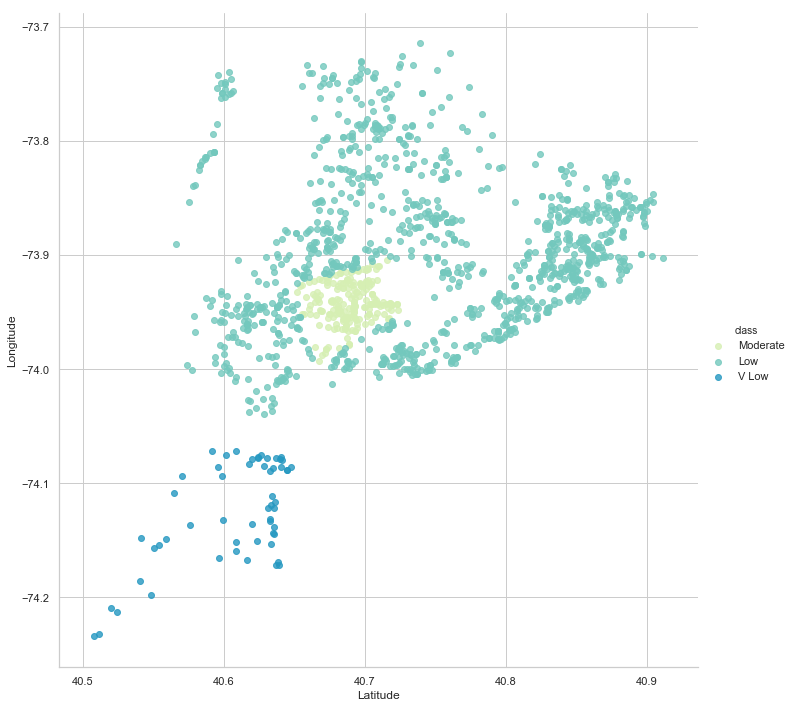

In [127]:
sns.set_style("whitegrid")
sns.set_palette("YlGnBu", 4)
sns.lmplot('Latitude', 'Longitude', data=final, hue='class', height=10, fit_reg=False, )
plt.savefig('images/bg_12_06.jpg')

### Duration 2: 6am to noon

In [609]:
df_06_12 = bg[(bg['hours'] >= 6) & (bg['hours'] <= 12)]
df_06_12.shape

(2589, 24)

In [610]:
df_06_12 = df_06_12[['Latitude', 'Longitude']].transpose()

In [611]:
# apply fuzzy c-mean function
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(df_06_12, 10, 2, error=0, maxiter=2000, init=None, seed=None)

In [612]:
fpc

0.5031902101912775

In [613]:
# get final membership
cluster = np.argmax(u, axis=0)

In [614]:
df_06_12 = df_06_12.transpose()

In [615]:
# add cluster membership to dataframe
df_06_12['cluster'] = cluster
df_06_12.head()

,Latitude,Longitude,cluster
1,40.723869,-73.900987,9
2,40.834503,-73.913373,0
7,40.639191,-74.094902,2
13,40.626550,-73.940204,5
19,40.630991,-73.900682,8


In [616]:
df_06_12['cluster'].value_counts()

8    389
6    320
0    309
7    294
9    288
1    261
5    240
4    206
3    184
2     98
Name: cluster, dtype: int64

In [617]:
vhigh = df_06_12[(df_06_12['cluster'] == 8) | (df_06_12['cluster'] == 6)| (df_06_12['cluster'] == 0)]
vhigh['class'] = 'V High'
high = df_06_12[(df_06_12['cluster'] == 1) | (df_06_12['cluster'] == 9)| (df_06_12['cluster'] == 7)]
high['class'] = 'High'
mod = df_06_12[(df_06_12['cluster'] == 4) | (df_06_12['cluster'] == 5)]
mod['class'] = 'Moderate'
low = df_06_12[(df_06_12['cluster'] == 3)]
low['class'] = 'Low'
vlow = df_06_12[(df_06_12['cluster'] == 2)]
vlow['class'] = 'V Low'
final = pd.concat([vhigh, high, mod, low, vlow], axis=0)
final['class'].unique()

C:\Users\Alfa\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Alfa\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\Alfa\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pa

array(['V High', 'High', 'Moderate', 'Low', 'V Low'], dtype=object)

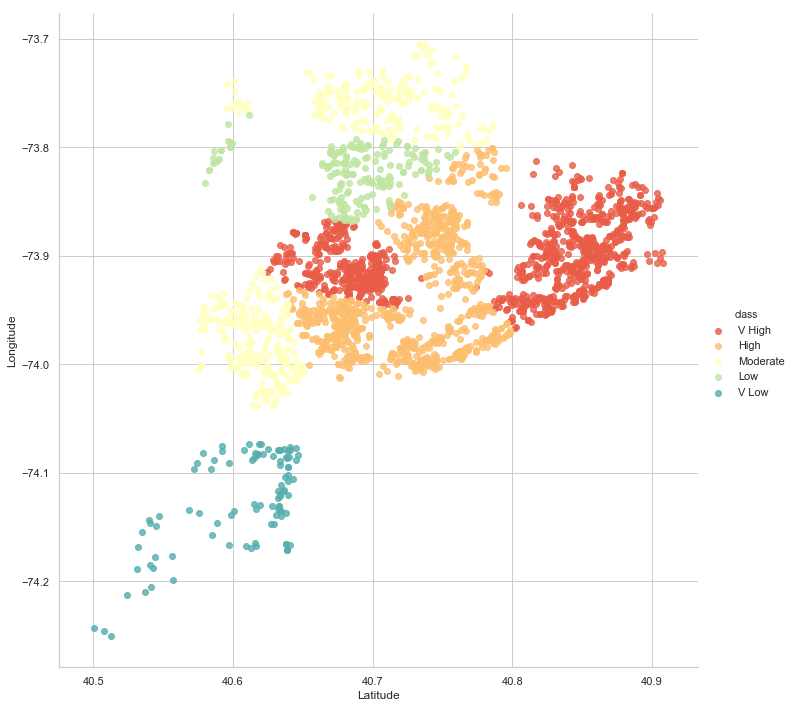

In [618]:
sns.set_style("whitegrid")
sns.set_palette("Spectral", 5)
sns.lmplot('Latitude', 'Longitude', data=final, hue='class', height=10, fit_reg=False, )
plt.savefig('images/bg_06_12.jpg')

### Duration 3: Noon to 6pm

In [550]:
df_12_18 = bg[(bg['hours'] >= 12) & (bg['hours'] <= 18)]
df_12_18.shape

(2509, 24)

In [551]:
df_12_18 = df_12_18[['Latitude', 'Longitude']].transpose()
df_12_18.shape

(2, 2509)

In [552]:
df_12_18.head()

,0,1,6,9,12,16,17,18,21,23,...,7057,7058,7059,7071,7072,7073,7074,7075,7082,7085
Latitude,40.828142,40.723869,40.828724,40.743655,40.747973,40.613802,40.642147,40.613802,40.719931,40.875699,...,40.719220,40.730865,40.614847,40.818137,40.697204,40.599247,40.854710,40.711950,40.703795,40.869652
Longitude,-73.941772,-73.900987,-73.923191,-73.909857,-73.977539,-74.008826,-73.973589,-74.008826,-73.759761,-73.880540,...,-73.985492,-73.981485,-73.954337,-73.936766,-73.932059,-74.096228,-73.935332,-73.753661,-73.929120,-73.888144


In [553]:
# apply fuzzy c-mean function
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(df_12_18, 10, 2, error=0, maxiter=2000, init=None, seed=None)

In [554]:
fpc

0.5037681891349627

In [555]:
# get final membership
cluster = np.argmax(u, axis=0)

In [556]:
df_12_18 = df_12_18.transpose()

In [557]:
# add cluster membership to dataframe
df_12_18['cluster'] = cluster
df_12_18.head()

,Latitude,Longitude,cluster
0,40.828142,-73.941772,5
1,40.723869,-73.900987,6
6,40.828724,-73.923191,5
9,40.743655,-73.909857,6
12,40.747973,-73.977539,8


In [558]:
df_12_18['cluster'].value_counts()

5    329
1    323
4    314
9    301
6    278
7    254
3    220
0    200
8    189
2    101
Name: cluster, dtype: int64

In [560]:
vhigh = df_12_18[(df_12_18['cluster'] == 5) | (df_12_18['cluster'] == 1) | (df_12_18['cluster'] == 4)]
vhigh['class'] = 'V High'
high = df_12_18[(df_12_18['cluster'] == 6) | (df_12_18['cluster'] == 7) | (df_12_18['cluster'] == 9)]
high['class'] = 'High'
mod = df_12_18[(df_12_18['cluster'] == 3)]
mod['class'] = 'Moderate'
low = df_12_18[(df_12_18['cluster'] == 8) | (df_12_18['cluster'] == 0)]
low['class'] = 'Low'
vlow = df_12_18[(df_12_18['cluster'] == 2)]
vlow['class'] = 'V Low'
final = pd.concat([vhigh, high, mod, low, vlow], axis=0)
final['class'].unique()

C:\Users\Alfa\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Alfa\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\Alfa\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pa

array(['V High', 'High', 'Moderate', 'Low', 'V Low'], dtype=object)

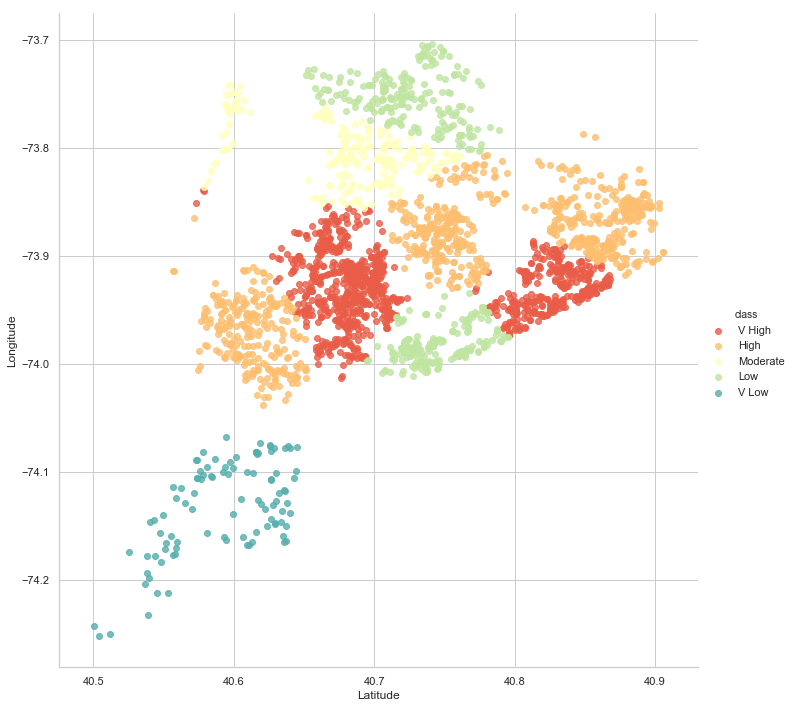

In [561]:
sns.set_style("whitegrid")
sns.set_palette("Spectral", 5)
sns.lmplot('Latitude', 'Longitude', data=final, hue='class', height=10, fit_reg=False, )
plt.savefig('images/bg_12_18.jpg')

### Duration 4: 6pm to midnight

In [562]:
df_18_00 = bg[(bg['hours'] >= 12) & (bg['hours'] <= 18)]
df_18_00.shape

(2509, 24)

In [563]:
df_18_00 = df_18_00[['Latitude', 'Longitude']].transpose()
df_18_00.shape

(2, 2509)

In [564]:
# apply fuzzy c-mean function
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(df_18_00, 10, 2, error=0, maxiter=2000, init=None, seed=None)

In [565]:
fpc

0.5037681891349729

In [566]:
# get final membership
cluster = np.argmax(u, axis=0)

In [567]:
df_18_00 = df_18_00.transpose()

In [568]:
# add cluster membership to dataframe
df_18_00['cluster'] = cluster
df_18_00.head()

,Latitude,Longitude,cluster
0,40.828142,-73.941772,3
1,40.723869,-73.900987,5
6,40.828724,-73.923191,3
9,40.743655,-73.909857,5
12,40.747973,-73.977539,9


In [569]:
df_18_00['cluster'].value_counts()

3    329
4    323
7    314
6    301
5    278
8    254
0    220
2    200
9    189
1    101
Name: cluster, dtype: int64

In [570]:
vhigh = df_18_00[(df_18_00['cluster'] == 3) | (df_18_00['cluster'] == 4) | (df_18_00['cluster'] == 7)]
vhigh['class'] = 'V High'
high = df_18_00[(df_18_00['cluster'] == 8) | (df_18_00['cluster'] == 5) | (df_18_00['cluster'] == 6)]
high['class'] = 'High'
mod = df_18_00[(df_18_00['cluster'] == 0)]
mod['class'] = 'Moderate'
low = df_18_00[(df_18_00['cluster'] == 9) | (df_18_00['cluster'] == 2)]
low['class'] = 'Low'
vlow = df_18_00[(df_18_00['cluster'] == 1)]
vlow['class'] = 'V Low'
final = pd.concat([vhigh, high, mod, low, vlow], axis=0)
final['class'].unique()

C:\Users\Alfa\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Alfa\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\Alfa\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pa

array(['V High', 'High', 'Moderate', 'Low', 'V Low'], dtype=object)

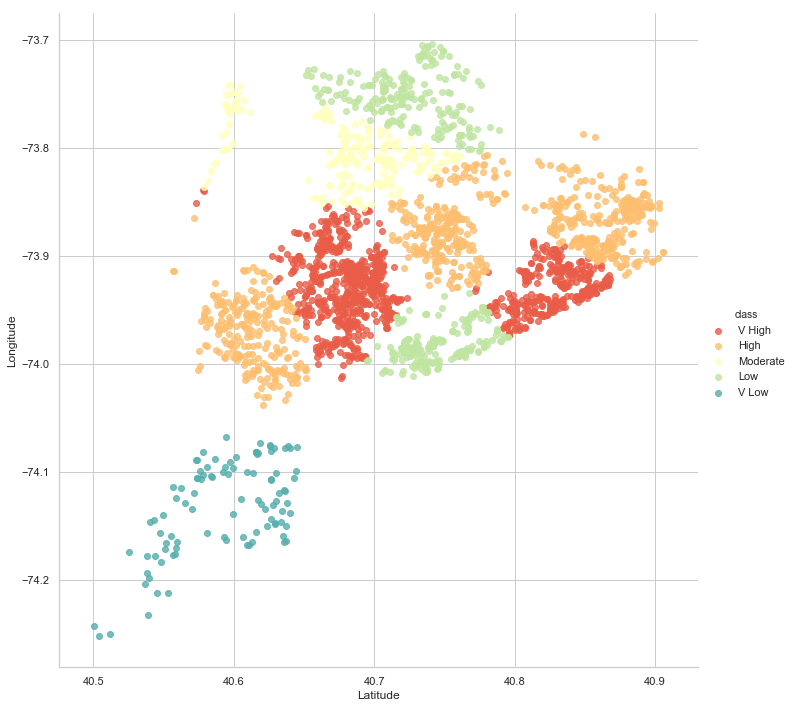

In [571]:
sns.set_style("whitegrid")
sns.set_palette("Spectral", 5)
sns.lmplot('Latitude', 'Longitude', data=final, hue='class', height=10, fit_reg=False, )
plt.savefig('images/bg_18_12.jpg')